In [28]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
dataset_path = "../Data/features_30_sec.csv"

data = pd.read_csv(dataset_path)

spectral_features = [
    "chroma_stft_mean", "chroma_stft_var",
    "spectral_centroid_mean", "spectral_centroid_var",
    "rolloff_mean", "rolloff_var"
]
rhythmic_features = ["tempo"]
mfcc_features = [
    "mfcc1_mean", "mfcc1_var",
    "mfcc2_mean", "mfcc2_var",
    "mfcc3_mean", "mfcc3_var"
]

selected_features = spectral_features + rhythmic_features + mfcc_features

X = data[selected_features]
y = data["label"]

# print("Selected Features Shape:", X_selected.shape)
# print("Labels Shape:", y.shape)

# print(X_selected.head())

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Labels Shape:", y_val.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (700, 13)
Validation Features Shape: (150, 13)
Testing Features Shape: (150, 13)
Training Labels Shape: (700,)
Validation Labels Shape: (150,)
Testing Labels Shape: (150,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def RandomForestModel(n: int):
    randomForest = RandomForestClassifier(n_estimators=n, random_state=42)

    randomForest.fit(X_train, y_train)
    yPred = randomForest.predict(X_val)

    valAccuracy = accuracy_score(y_val, yPred)
    valAccuracy = round(valAccuracy, 4)
    # print("Validation Accuracy:", valAccuracy)

    # print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
    # print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

    yTestPred = randomForest.predict(X_test)
    testAccuracy = accuracy_score(y_test, yTestPred)
    testAccuracy = round(testAccuracy, 4)
    # print("Test Accuracy:", testAccuracy)

    return valAccuracy, testAccuracy

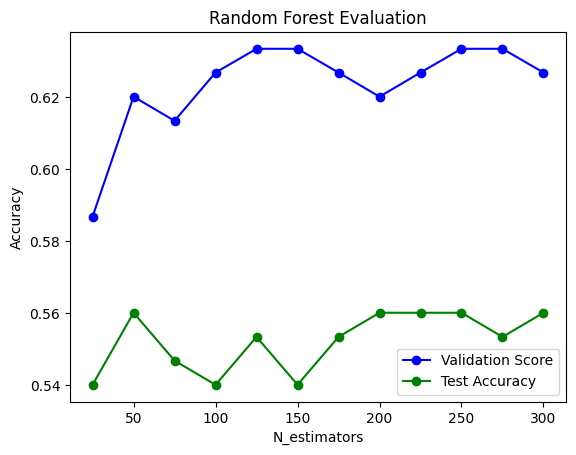

In [40]:
# Sample data
estimators = [25,50,75,100,125,150,175,200,225,250,275,300]

validations = []
testAccuracy = []

for x in estimators:
    y1, y2 = (RandomForestModel(x))

    validations.append(y1)
    testAccuracy.append(y2)


plt.plot(estimators, validations, linestyle='-', marker='o', color='blue', label='Validation Score')
plt.plot(estimators, testAccuracy, linestyle='-', marker='o', color='green', label='Test Accuracy')

# Add labels and title
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Evaluation')

# Add a legend
plt.legend()

# Display the plot
plt.show()